In [1]:
import pandas as pd
df = pd.read_csv('Invistico_Airline.csv')
print(df.shape)
df.head()

(129880, 23)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [2]:
df[df.isna().any(axis=1)].count()[0]

393

### Dropping all NaN values for now

In [3]:
df.dropna(inplace=True)

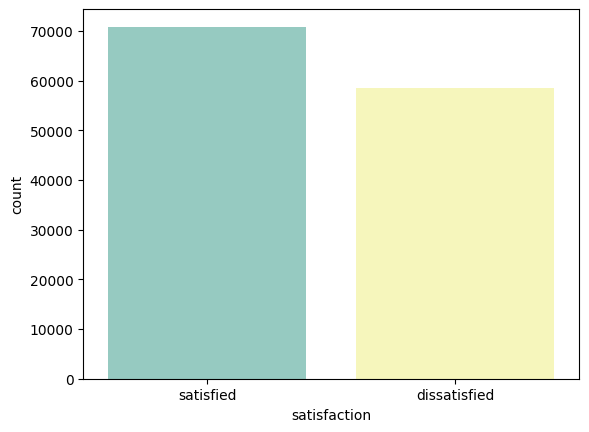

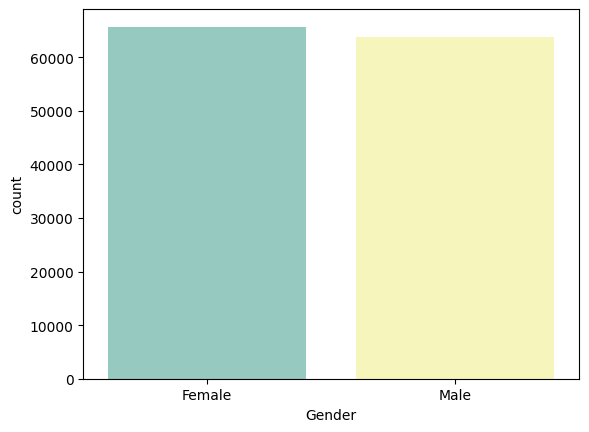

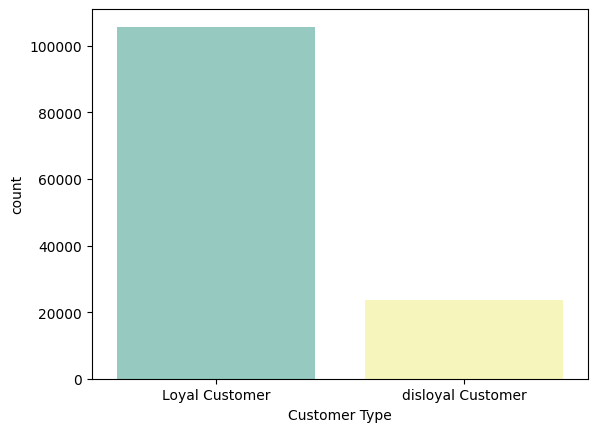

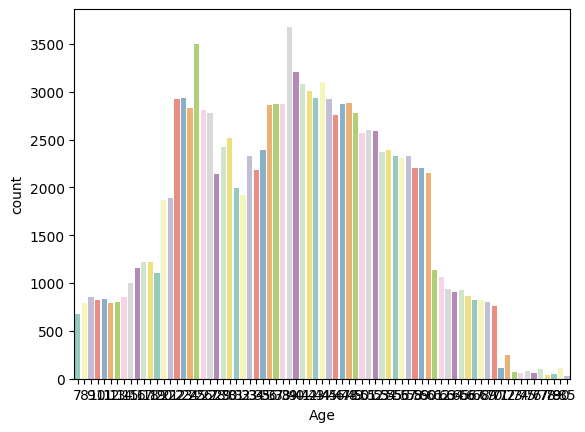

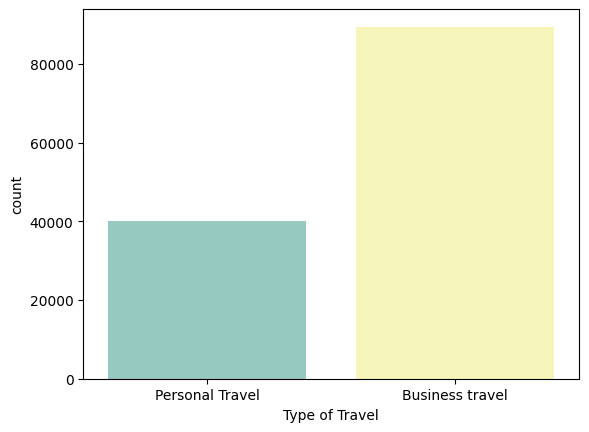

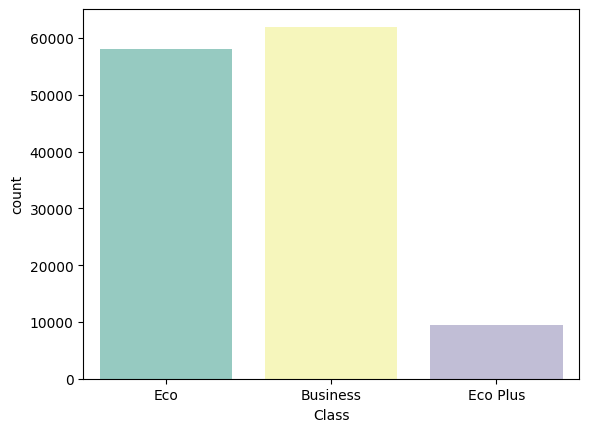

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in ['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class']:
    sns.countplot(df, x=i, palette='Set3')
    plt.show()

In [5]:
encoded_df = pd.get_dummies(df, columns=['Gender', 'Customer Type', "Type of Travel", "Class"])
encoded_df["satisfaction"][encoded_df["satisfaction"] == "satisfied"] = True
encoded_df["satisfaction"][encoded_df["satisfaction"] == "dissatisfied"] = False
encoded_df["satisfaction"] = encoded_df["satisfaction"].astype('bool')
encoded_df.tail()

/tmp/ipykernel_185358/4016748408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df["satisfaction"][encoded_df["satisfaction"] == "satisfied"] = True
/tmp/ipykernel_185358/4016748408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df["satisfaction"][encoded_df["satisfaction"] == "dissatisfied"] = False


,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
129875,True,29,1731,5,5,5,3,2,5,2,...,0.0,True,False,False,True,False,True,False,True,False
129876,False,63,2087,2,3,2,4,2,1,1,...,172.0,False,True,False,True,False,True,True,False,False
129877,False,69,2320,3,0,3,3,3,2,2,...,163.0,False,True,False,True,False,True,False,True,False
129878,False,66,2450,3,2,3,2,3,2,2,...,205.0,False,True,False,True,False,True,False,True,False
129879,False,38,4307,3,4,3,3,3,3,3,...,186.0,True,False,False,True,False,True,False,True,False


## Important Feature Selections

- Using any of Random Forest, Decision Tree or other Feature Importance variables

First seperate target and feature variables from the dataframe

In [6]:
X = encoded_df.drop(columns=["satisfaction"])
y = encoded_df["satisfaction"]
print(X.shape, y.shape)

(129487, 27) (129487,)


### Sort features with most influence on decision boundaryA

Just use sklearn's decision tree classifier. It provides feature importance it used to generate that tree and then use it.
I'm too lazy rn to implement that rn.

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(X, y)

feature_df = pd.DataFrame(zip(X.columns, dt.feature_importances_), columns=["Features", "Importance"])
feature_df.head()

,Features,Importance
0,Age,0.000000
1,Flight Distance,0.000000
2,Seat comfort,0.268701
3,Departure/Arrival time convenient,0.002504
4,Food and drink,0.000000


### Only choosing whose feature importances are not 0 and sorted with highest importance on top

In [8]:
discardedFeatures = feature_df[feature_df["Importance"]<0.0001]
discardedFeatures = list(discardedFeatures.sort_values(by="Importance", ascending=False).Features)
discardedFeatures

['Inflight wifi service',
 'Age',
 'Flight Distance',
 'Food and drink',
 'On-board service',
 'Baggage handling',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Eco',
 'Class_Eco Plus']

In [9]:
filtered_df = encoded_df.drop(columns=discardedFeatures)
filtered_df.head()

,satisfaction,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight entertainment,Online support,Ease of Online booking,Leg room service,Checkin service,Online boarding,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business
0,True,0,0,2,4,2,3,0,5,2,0.0,True,False,True,False,False
1,True,0,0,3,2,2,3,4,2,2,305.0,False,True,True,False,True
2,True,0,0,3,0,2,2,3,4,2,0.0,True,False,True,False,False
3,True,0,0,3,4,3,1,0,4,3,0.0,True,False,True,False,False
4,True,0,0,3,3,4,2,0,4,5,0.0,True,False,True,False,False


## Preparing for Model Training and Testing

In [10]:
import random
train = filtered_df.sample(frac=0.4, random_state=20)
test = filtered_df.drop(index=train.index).sample(frac=0.2, random_state=20)
print(len(train.index), len(test.index))

51795 15538


In [67]:
xTrain = train.drop(columns="satisfaction")
yTrain = train["satisfaction"]

xTest = test.drop(columns="satisfaction")
yTest = test["satisfaction"]

print(xTrain.shape, xTest.shape)

(51795, 15) (15538, 15)


In [75]:
def sigmoid(z):
    return 1/(1+2.71828 ** z[:])

def predict(x,w,b):
    return sigmoid(-np.matmul(x, w) - b)

In [76]:
def computeGradient(xT, yT, _w, _bias):
    m,n = xT.shape
    predicted = predict(xT,_w,_bias)

    costs = predicted-yT
    
    dj_db = np.sum(costs)/m
    
    transposedX = np.transpose(xT)
    
    newWeights = np.matmul(transposedX, costs)
    
    dj_dw = np.transpose(newWeights)/m
    
    return dj_dw,dj_db,costs

In [94]:
w = np.zeros((xTrain.shape[1], ))
bias = 0
errorHistory = []
lrate = 0.005

errorMin = 1
while errorMin > 0.1:
    d_w,d_b,costs = computeGradient(xTrain.values, yTrain.values, w, bias)
    
    bias -= lrate * d_b
    w -= (d_w * lrate).astype('float64')

    errorHistory.append(np.sum(np.absolute(costs)))
    if len(errorHistory) > 1:
        errorMin = abs(errorHistory[-2] - errorHistory[-1])
    print("Error: %.2f" % np.sum(np.abs(costs)), " | Diff: %.5f" % errorMin, end='\r')
print("\nDone training")

Error: 15696.19  | Diff: 0.1000028
Done training


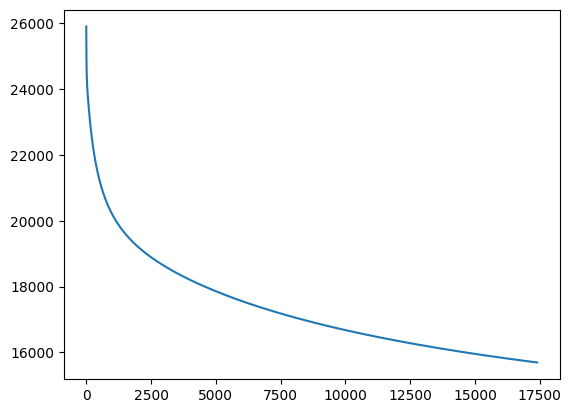

In [95]:
plt.plot(errorHistory)

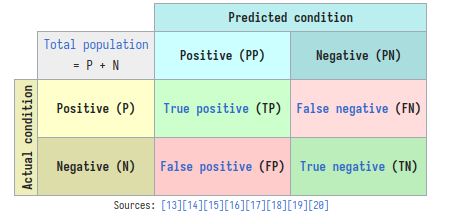

In [96]:
## Actual,Predicted
# True Positive   True Negative
# False Positive  False Negative
def confusionMatrix(predicted, trueVals):
    m = [[0,0], [0,0]]
    for i in range(len(predicted)):
        if trueVals[i]==True:
            if predicted[i] == True:
                m[0][0] += 1
            else:
                m[0][1] += 1
        else:
            if predicted[i] == False:
                m[1][1] += 1
            else:
                m[1][0] += 1
    return m

predictedValues = [False if abs(i) < 0.5 else True for i in predict(xTrain.values, w, bias)]
mse = confusionMatrix(predictedValues, yTrain.values)
print("MSE: ", mse)
print("Error: ", (mse[0][1] + mse[1][0])/len(predictedValues) * 100, " %")

MSE:  [[24558, 3782], [6042, 17413]]
Error:  18.967081764649095  %
